<h1>Week 43<h1>

In [48]:
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as pltfound
from sklearn.metrics import accuracy_score


# Defining some activation functions
def ReLU(z):
    return np.where(z > 0, z, 0)


# Derivative of the ReLU function
def ReLU_der(z):
    return np.where(z > 0, 1, 0)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def mse(predict, target):
    return np.mean((predict - target) ** 2)

<h2>Exercise 1 - Understand the feed forward pass<h2>

last weeks exercise completed... check

<h2>Exercise 2 - Gradient with one layer using autograd<h2>

For the first few exercises, we will not use batched inputs. Only a single input vector is passed through the layer at a time.

In this exercise you will compute the gradient of a single layer. You only need to change the code in the cells right below an exercise, the rest works out of the box. Feel free to make changes and see how stuff works though!

a) If the weights and bias of a layer has shapes (10, 4) and (10), what will the shapes of the gradients of the cost function wrt. these weights and this bias be?
The gradient of the cost function will have the same shapes as the weights (10,4)
The shape of the gradient of cost will have the same shape as the bias


b) Complete the feed_forward_one_layer function. It should use the sigmoid activation function. Also define the weigth and bias with the correct shapes.

In [49]:
def feed_forward_one_layer(W, b, x):
    z = np.dot(W, x) + b
    a = sigmoid(z)
    return a


def cost_one_layer(W, b, x, target):
    predict = feed_forward_one_layer(W, b, x)
    return mse(predict, target)


x = np.random.rand(2)
target = np.random.rand(3)

W = np.random.rand(3, 2)
b = np.random.rand(3)

c) Compute the gradient of the cost function wrt. the weigth and bias by running the cell below. You will not need to change anything, just make sure it runs by defining things correctly in the cell above. This code uses the autograd package which uses backprogagation to compute the gradient!

In [50]:
autograd_one_layer = grad(cost_one_layer, [0, 1])
W_g, b_g = autograd_one_layer(W, b, x, target)
print(W_g, b_g)

[[-0.00592191 -0.00054843]
 [ 0.01333464  0.00123493]
 [ 0.0096954   0.0008979 ]] [-0.02961008  0.06667436  0.04847782]


<h2>Exercise 3 - Gradient with one layer writing backpropagation by hand<h2>

Before you use the gradient you found using autograd, you will have to find the gradient “manually”, to better understand how the backpropagation computation works. To do backpropagation “manually”, you will need to write out expressions for many derivatives along the computation.

We want to find the gradient of the cost function wrt. the weight and bias. This is quite hard to do directly, so we instead use the chain rule to combine multiple derivatives which are easier to compute.

$$\frac{dC}{dW} = \frac{dC}{da}\frac{da}{dz}\frac{dz}{dW} $$
$$\frac{dC}{db} = \frac{dC}{da}\frac{da}{dz}\frac{dz}{dW} $$

a) The intermediary results $\frac{dC}{da}$ and $\frac{da}{dz}$ can be reused for both weight gradient and bias gradient.
b) The derivative of the cost with respect to acitvation output is $\frac{dC}{da} = 2/n (a - target)$



In [51]:
z = W @ x + b
a = sigmoid(z)

predict = a


def mse_der(predict, target):
    return 2 * (predict - target) / len(predict)


print(mse_der(predict, target))

cost_autograd = grad(mse, 0)
print(cost_autograd(predict, target))

[-0.12417357  0.33060537  0.2223989 ]
[-0.12417357  0.33060537  0.2223989 ]


c) What is the expression for the derivative of the sigmoid activation function? You can use the autograd calculation to make sure you get the correct result.

$$σ (z) = 1/(1+e{-z})$$
$$ \frac{d σ }{dz} = σ * (1-σ )$$

In [52]:
def sigmoid_der(z):
    sig = sigmoid(z)
    return sig * (1 - sig)


print(sigmoid_der(z))

sigmoid_autograd = elementwise_grad(sigmoid, 0)
print(sigmoid_autograd(z))

[0.23845722 0.20167357 0.21797688]
[0.23845722 0.20167357 0.21797688]


d) Using the two derivatives you just computed, compute this intermetidary gradient you will use later:

$$ \frac{dC}{dz} =  \frac{dC}{da} \frac{da}{dz}$$

In [53]:
dC_da = mse_der(predict, target)
dC_dz = dC_da * sigmoid_der(z)

e) What is the derivative of the intermediary z wrt. the weight and bias? What should the shapes be? The one for the weights is a little tricky, it can be easier to play around in the next exercise first. You can also try computing it with autograd to get a hint.

f) Now combine the expressions you have worked with so far to compute the gradients! Note that you always need to do a feed forward pass while saving the zs and as before you do backpropagation, as they are used in the derivative expressions

In [54]:
dA_dz = sigmoid_der(z)  # Derivative of the activation function
dC_dz = dC_da * dA_dz   # Chain rule

# Calculate dC/dW and dC/db
# dC/dW = dC/dz * dz/dW (where dz/dW = x.T)
dC_dW = np.outer(dC_dz, x)  # Shape (3,) x (2,) -> (3, 2)

# dC/db = dC/dz (as the bias is added directly)
dC_db = dC_dz  # Shape (3,)


print(dC_dW, dC_db)

[[-0.00592191 -0.00054843]
 [ 0.01333464  0.00123493]
 [ 0.0096954   0.0008979 ]] [-0.02961008  0.06667436  0.04847782]


In [55]:
W_g, b_g = autograd_one_layer(W, b, x, target)
print(W_g, b_g)

[[-0.00592191 -0.00054843]
 [ 0.01333464  0.00123493]
 [ 0.0096954   0.0008979 ]] [-0.02961008  0.06667436  0.04847782]


<h2>Exercise 4 - Gradient with two layers writing backpropagation by hand<h2>

In [56]:
x = np.random.rand(2)
target = np.random.rand(4)

W1 = np.random.rand(3, 2)
b1 = np.random.rand(3)

W2 = np.random.rand(4, 3)
b2 = np.random.rand(4)

layers = [(W1, b1), (W2, b2)]

z1 = W1 @ x + b1
a1 = sigmoid(z1)
z2 = W2 @ a1 + b2
a2 = sigmoid(z2)

In [57]:
dC_da2 = 2 * (a2 - target) / target.size  

dA_dz2 = sigmoid_der(z2) 
dC_dz2 = dC_da2 * dA_dz2   

dC_dW2 = np.outer(dC_dz2, a1) 
dC_db2 = dC_dz2 

print("Gradient with respect to W2:\n", dC_dW2)
print("Gradient with respect to b2:\n", dC_db2)

Gradient with respect to W2:
 [[0.00160399 0.00180104 0.00153336]
 [0.02479391 0.02783989 0.02370222]
 [0.01660961 0.01865013 0.01587828]
 [0.02952328 0.03315028 0.02822336]]
Gradient with respect to b2:
 [0.00238876 0.03692466 0.02473607 0.04396794]


To find the derivative of the cost wrt. the activation of the first layer, we need a new expression, the one furthest to the right in the following.

$$\frac{dC}{d_a1} = \frac{dC}{dz_2} \frac{dz_2}{da_1}$$

b) What is the derivative of the second layer intermetiate wrt. the first layer activation? (First recall how you compute  $z_2$)

$$ \frac{dz_2}{da_1}$$

c) Use this expression, together with expressions which are equivelent to ones for the last layer to compute all the derivatives of the first layer.
$$ \frac{dC}{dW_1} = \frac{dC}{da_1} \frac{da_1}{dz_1} \frac{dz_1}{dW_1}$$
$$ \frac{dC}{db_1} = \frac{dC}{da_1} \frac{da_1}{dz_1} \frac{dz_1}{db_1}$$

In [58]:
dC_da1 = dC_dz2 @ W2
dC_dz1 = dC_da1 * sigmoid_der(z1)
dC_dW1 = np.outer(dC_dz1, x)
dC_db1 = dC_dz1
print(dC_dW1, dC_db1)
print(dC_dW2, dC_db2)

[[0.00677529 0.00746185]
 [0.00260275 0.00286649]
 [0.00946187 0.01042066]] [0.01264914 0.0048592  0.01766484]
[[0.00160399 0.00180104 0.00153336]
 [0.02479391 0.02783989 0.02370222]
 [0.01660961 0.01865013 0.01587828]
 [0.02952328 0.03315028 0.02822336]] [0.00238876 0.03692466 0.02473607 0.04396794]


d) Make sure you got the same gradient as the following code which uses autograd to do backpropagation.

In [59]:
def feed_forward_two_layers(layers, x):
    W1, b1 = layers[0]
    z1 = W1 @ x + b1
    a1 = sigmoid(z1)

    W2, b2 = layers[1]
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)

    return a2
def cost_two_layers(layers, x, target):
    predict = feed_forward_two_layers(layers, x)
    return mse(predict, target)


grad_two_layers = grad(cost_two_layers, 0)
grad_two_layers(layers, x, target)

[(array([[0.00677529, 0.00746185],
         [0.00260275, 0.00286649],
         [0.00946187, 0.01042066]]),
  array([0.01264914, 0.0048592 , 0.01766484])),
 (array([[0.00160399, 0.00180104, 0.00153336],
         [0.02479391, 0.02783989, 0.02370222],
         [0.01660961, 0.01865013, 0.01587828],
         [0.02952328, 0.03315028, 0.02822336]]),
  array([0.00238876, 0.03692466, 0.02473607, 0.04396794]))]

e) How would you use the gradient from this layer to compute the gradient of an even earlier layer? Would the expressions be any different?

By using the chain rule iteratively, you can compute gradients for any layer in a feedforward neural network. Its important to ensure that you keep track of the necessary derivatives and correctly apply the relationships between the layers. THe method can be extended to networks with any number of layers

<h2>Exercise 5 - Gradient with any number of layers writing backpropagation by hand<h2>

In [60]:
def create_layers(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers


def feed_forward(input, layers, activation_funcs):
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = W @ a + b
        a = activation_func(z)
    return a


def cost(layers, input, activation_funcs, target):
    predict = feed_forward(input, layers, activation_funcs)
    return mse(predict, target)

In [61]:
def feed_forward_saver(input, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = W @ a + b
        a = activation_func(z)
        print(a.shape)

        zs.append(z)

    return layer_inputs, zs, a

a) Now, complete the backpropagation function so that it returns the gradient of the cost function wrt. all the weigths and biases. Use the autograd calculation below to make sure you get the correct answer

In [62]:
def backpropagation(
    input, layers, activation_funcs, target, activation_ders, cost_der=mse_der
):
    layer_inputs, zs, predict = feed_forward_saver(input, layers, activation_funcs)

    layer_grads = [() for layer in layers]

    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]

        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predict, target)
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, b) = layers[i + 1]
            dC_da = W.T @ dC_dz

        dC_dz = dC_da * activation_der(z)
        dC_dW = np.outer(dC_dz, layer_input)
        dC_db = dC_dz

        layer_grads[i] = (dC_dW, dC_db)

    return layer_grads

In [63]:
network_input_size = 2
layer_output_sizes = [3, 4]
activation_funcs = [sigmoid, ReLU]
activation_ders = [sigmoid_der, ReLU_der]

layers = create_layers(network_input_size, layer_output_sizes)

x = np.random.rand(network_input_size)
target = np.random.rand(4)

In [64]:
layer_grads = backpropagation(x, layers, activation_funcs, target, activation_ders)

cost_grad = grad(cost, 0)
grads = cost_grad(layers, x, activation_funcs, target)

(3,)
(4,)


<h2>
Exercise 6 - Batched inputs<h2>

In [65]:
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size).T
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers

def feed_forward_batch(input, layers, activation_funcs):
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = a@W+b#np.einsum("ijk,ik->ij", W, a) + b
        a = activation_func(z)
    return a

def cost_batch(layers, input, activation_funcs, target):
    predict = feed_forward_batch(input, layers, activation_funcs)
    return mse(predict, target)

def feed_forward_saver_batch(input, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        print(a.shape, W.shape, b.shape)
        #(20,) (2, 30, 20) (2, 30)
        layer_inputs.append(a)
        z = np.dot(a,W) +b#np.einsum("ijk,i->ij", W, a) + b
        a = activation_func(z)

        zs.append(z)

    return layer_inputs, zs, a


def backpropagation_batch(
    input, layers, activation_funcs, target, activation_ders, cost_der=mse_der
):
    layer_inputs, zs, predict = feed_forward_saver_batch(input, layers, activation_funcs)

    layer_grads = [() for layer in layers]

    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]

        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predict, target)
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, b) = layers[i + 1]
            dC_da = dC_dz @ W.T

        dC_dz = dC_da * activation_der(z)
        dC_dW = np.outer(dC_dz,layer_input )#np.einsum("ij,ik->ijk", dC_dz, layer_input)
        dC_db = dC_dz

        layer_grads[i] = (dC_dW, dC_db)

    return layer_grads

network_input_size = 20
layer_output_sizes = [30, 40]
activation_funcs = [sigmoid, ReLU]
activation_ders = [sigmoid_der, ReLU_der]


layers = create_layers_batch(network_input_size, layer_output_sizes)

x = np.random.rand(network_input_size)
target = np.random.rand(40)

layer_grads = backpropagation_batch(x, layers, activation_funcs, target, activation_ders)
print(layer_grads)

cost_grad = grad(cost_batch, 0)
grads = cost_grad(layers, x, activation_funcs, target)

(20,) (20, 30) (30,)
(30,) (30, 40) (40,)
[(array([[ 2.75604058e-01,  2.67603952e-01,  3.78656826e-01,
         1.14577566e-01,  1.15774763e-01,  3.64776169e-01,
         3.17610296e-01,  8.08053318e-02,  2.26512548e-01,
         2.96335004e-01,  1.40281748e-01,  1.72605157e-01,
         2.28638306e-01,  1.85609208e-01,  2.99227234e-01,
         2.35980984e-03,  1.72704605e-01,  1.34140578e-01,
         2.42056061e-01,  3.08333105e-01],
       [ 9.17846670e-02,  8.91203845e-02,  1.26104423e-01,
         3.81578698e-02,  3.85565734e-02,  1.21481735e-01,
         1.05774042e-01,  2.69106723e-02,  7.54356775e-02,
         9.86887127e-02,  4.67181566e-02,  5.74828504e-02,
         7.61436207e-02,  6.18136014e-02,  9.96519147e-02,
         7.85889591e-04,  5.75159697e-02,  4.46729572e-02,
         8.06121475e-02,  1.02684451e-01],
       [-9.01973024e-02, -8.75790972e-02, -1.23923517e-01,
        -3.74979507e-02, -3.78897590e-02, -1.19380777e-01,
        -1.03944739e-01, -2.64452672e-02, -7

<h2>Exercise 7 - Training<h2>

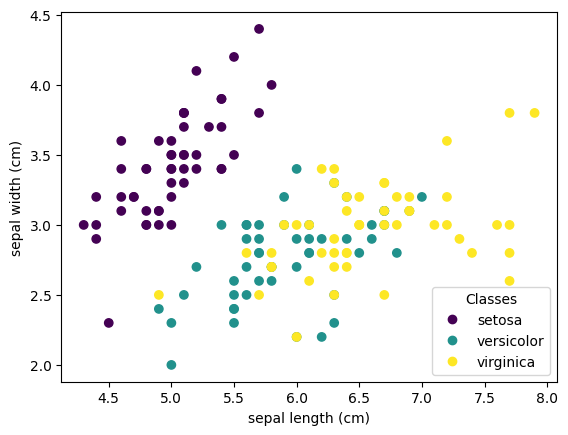

In [66]:
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Final accuracy: 0.96


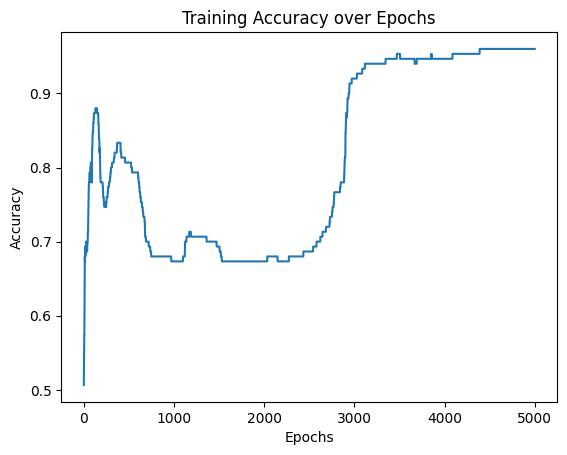

In [67]:
inputs = iris.data

# Since each prediction is a vector with a score for each of the three types of flowers,
# we need to make each target a vector with a 1 for the correct flower and a 0 for the others.
targets = np.zeros((len(iris.data), 3))
for i, t in enumerate(iris.target):
    targets[i, t] = 1

def accuracy(predictions, targets):
    one_hot_predictions = np.zeros(predictions.shape)
    for i, prediction in enumerate(predictions):
        one_hot_predictions[i, np.argmax(prediction)] = 1
    return accuracy_score(one_hot_predictions, targets)


def ReLU(z):
    return np.where(z > 0, z, 0)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=0))
    return e_z / np.sum(e_z, axis=1)[:, np.newaxis]


def softmax_vec(z):
    """Compute softmax values for each set of scores in the vector z.P
    Use this function when you use the activation function on one vector at a time"""
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

def sigmoid_der(z):
    sig = sigmoid(z)
    return sig * (1 - sig)

def ReLU_der(z):
    return np.where(z > 0, 1, 0)


def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(i_size, layer_output_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers


def feed_forward_saver_batch(input, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        print(a.shape, W.shape, b.shape)
        #(20,) (2, 30, 20) (2, 30)
        layer_inputs.append(a)
        z = np.dot(a,W) +b#np.einsum("ijk,i->ij", W, a) + b
        a = activation_func(z)

        zs.append(z)

    return layer_inputs, zs, a

def feed_forward_saver_batch(input, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = np.dot(a,W) + b
        a = activation_func(z)
        zs.append(z)

    return layer_inputs, zs, a

def backpropagation_batch(input, layers, activation_funcs, target, activation_ders, cost_der=mse_der):
    layer_inputs, zs, predict = feed_forward_saver_batch(input, layers, activation_funcs)

    layer_grads = [() for layer in layers]

    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]

        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predict, target)
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, b) = layers[i + 1]
            dC_da = dC_dz @ W.T

        dC_dz = dC_da * activation_der(z)
        dC_dW = np.dot(layer_input.T, dC_dz)  # (4, 150) . (150, 8) => (4, 8)
        dC_db = dC_dz.sum(axis=0) #shape 8

        layer_grads[i] = (dC_dW, dC_db)

    return layer_grads



def train_network(
    inputs, layers, activation_funcs, targets, learning_rate=0.001, epochs=100
):
    for i in range(epochs):
        layers_grad = backpropagation_batch(
            inputs, layers, activation_funcs, targets, activation_derivatives
        )
        for (W, b), (W_g, b_g) in zip(layers, layers_grad):
            W -= learning_rate * W_g
            b -= learning_rate * b_g
        

network_input_size = inputs.shape[1]
layer_output_sizes = [8, 3]
activation_functions = [sigmoid, softmax] 
activation_derivatives = [sigmoid_der, lambda x: 1]

layers = create_layers_batch(network_input_size, layer_output_sizes)

epochs = 5000
learning_rate = 0.005
accvals = []
for epoch in range(epochs):
    train_network(inputs, layers, activation_functions, targets, learning_rate, 1)
    preds = feed_forward_batch(inputs, layers, activation_functions)
    acc = accuracy(preds, targets)
    accvals.append(acc)
print(f"Final accuracy: {accvals[-1]}")

plt.plot(range(1, epochs + 1), accvals)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()

<h2>Exercise 8 (Optional) - Object orientation<h2>

Passing in the layers, activations functions, activation derivatives and cost derivatives into the functions each time leads to code which is easy to understand in isoloation, but messier when used in a larger context with data splitting, data scaling, gradient methods and so forth. Creating an object which stores these values can lead to code which is much easier to use.

a) Write a neural network class. You are free to implement it how you see fit, though we strongly recommend to not save any input or output values as class attributes, nor let the neural network class handle gradient methods internally. Gradient methods should be handled outside, by performing general operations on the layer_grads list using functions or classes separate to the neural network.

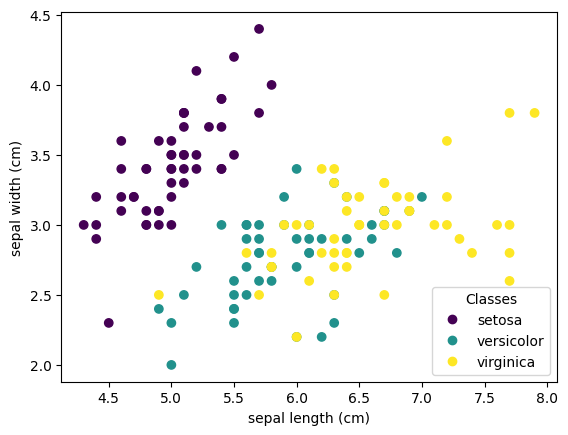

(150, 4)
Final accuracy: 0.9733333333333334


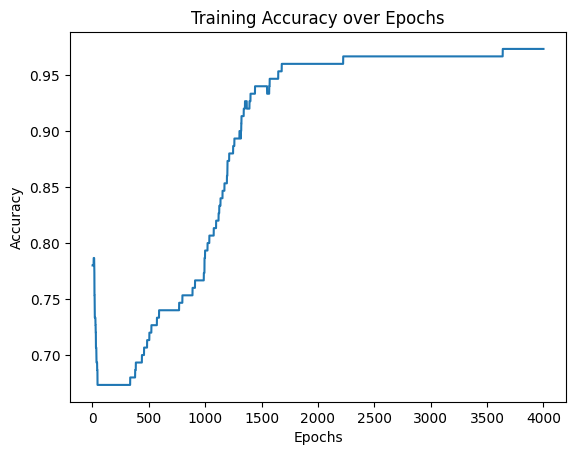

Final accuracy: 0.9733333333333334


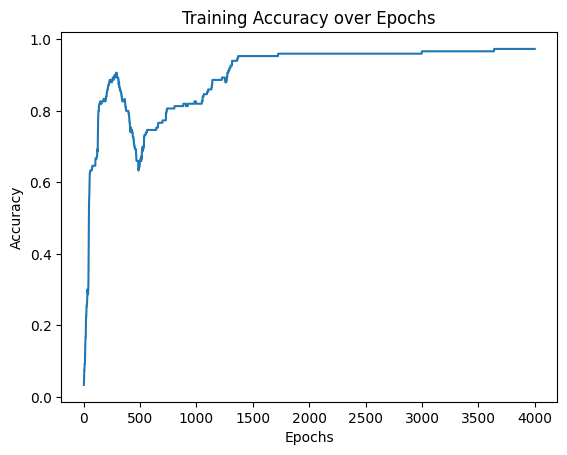

In [68]:
import autograd.numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
np.random.seed(0)

def accuracy(predictions, targets):
    one_hot_predictions = np.zeros(predictions.shape)
    for i, prediction in enumerate(predictions):
        one_hot_predictions[i, np.argmax(prediction)] = 1
    return accuracy_score(one_hot_predictions, targets)


def ReLU(z):
    return np.where(z > 0, z, 0)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=0,keepdims=True))
    return e_z / np.sum(e_z, axis=1,keepdims=True)


def softmax_vec(z):
    """Compute softmax values for each set of scores in the vector z.P
    Use this function when you use the activation function on one vector at a time"""
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

def sigmoid_der(z):
    sig = sigmoid(z)
    return sig * (1 - sig)

def ReLU_der(z):
    return np.where(z > 0, 1, 0)



class NeuralNetwork:
    def __init__(
        self,
        network_input_size,
        layer_output_sizes,
        activation_funcs,
        activation_ders,
        cost_fun,
        cost_der,
    ):
        self.NIS = network_input_size
        self.LOS = layer_output_sizes
        self.AF = activation_funcs
        self.AFder = activation_ders
        self.CF = cost_fun
        self.CFder = cost_der
        self.layers = self.create_layers()

    def predict(self, inputs):
        a = inputs

        for (W, b), activation_func in zip(self.layers, activation_funcs):
            z = np.dot(a,W) + b
            a = activation_func(z)
        return a
        

    def cost(self, inputs, targets):
        predict = self.predict(inputs)
        return self.CF(predict, targets)

    def _feed_forward_saver(self, inputs):
        layer_inputs = []
        zs = []
        a = inputs
        for (W, b), activation_func in zip(self.layers, activation_funcs):
            layer_inputs.append(a)
            z = np.dot(a,W) + b
            a = activation_func(z)
            zs.append(z)
        return layer_inputs, zs, a
    
    def create_layers(self):
        layers = []

        i_size = self.NIS
        for layer_output_size in self.LOS:
            W = np.random.randn(i_size, layer_output_size)
            b = np.random.randn(layer_output_size)
            layers.append((W, b))

            i_size = layer_output_size
        return layers

    def compute_gradient(self, inputs, targets):
        layer_inputs, zs, predict = self._feed_forward_saver(inputs)


        layer_grads = [() for layer in self.layers]

        for i in reversed(range(len(self.layers))):
            layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]

            if i == len(self.layers) - 1:
                dC_da = self.CFder(predict, targets)
            else:
                (W, b) = self.layers[i + 1]
                dC_da = dC_dz @ W.T

            dC_dz = dC_da * activation_der(z)
            dC_dW = np.dot(layer_input.T, dC_dz)
            dC_db = dC_dz.sum(axis=0)

            layer_grads[i] = (dC_dW, dC_db)

        return layer_grads

    def update_weights(self, layer_grads, learning_rate,inputs, targets):
        layer_grads = self.compute_gradient(inputs, targets)
        
        for (W, b), (W_g, b_g) in zip(self.layers, layer_grads):
            W -= learning_rate * W_g
            b -= learning_rate * b_g

    # These last two methods are not needed in the project, but they can be nice to have! The first one has a layers parameter so that you can use autograd on it
    def autograd_compliant_predict(self, inputs):
        a = inputs
        for (W, b), activation_func in zip(self.layers, self.AF):
            z = np.dot(a,W) + b
            a = activation_func(z) 
        return a

    def autograd_gradient(self, targets,inputs):
        from autograd import grad

        def cost_func_autograd(inputs, targets):
            pred = self.autograd_compliant_predict(inputs)
            return self.CF(pred, targets)

        gradients = grad(cost_func_autograd)(inputs, targets)
        return gradients
    
    
    


newdata = datasets.load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(newdata.data[:, 0], newdata.data[:, 1], c=newdata.target)
ax.set(xlabel=newdata.feature_names[0], ylabel=newdata.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], newdata.target_names, loc="lower right", title="Classes"
)
plt.show()
data = newdata.data
print(data.shape)
targets = np.zeros((len(data), 3))  
for i, t in enumerate(newdata.target):
    targets[i, t] = 1


network_input_size = data.shape[1]
layer_output_sizes = [8,3]#[network_input_size, 3]
activation_funcs = [sigmoid, softmax]
activation_ders = [sigmoid_der, lambda x: 1]

def mse_der(predict, target):
    return 2 * (predict - target) / len(predict)

def cross_entropy(predict, target):
    predict = np.clip(predict, 1e-15, 1 - 1e-15)
    return np.sum(-target * np.log(predict))

network = NeuralNetwork(
    network_input_size,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    cross_entropy,
    mse_der,
)

learning_rate = 0.01
epochs = 4000

accuracy_values = []

for epoch in range(epochs):
    grads = network.compute_gradient(data, targets)
    network.update_weights(grads, learning_rate, data, targets)
    preds = network.predict(data)
    acc = accuracy(preds, targets)
    accuracy_values.append(acc)
print(f"Final accuracy: {accuracy_values[-1]}")


plt.plot(range(1, epochs + 1), accuracy_values)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()

#again, but using auto grad
network = NeuralNetwork(
    network_input_size,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    cross_entropy,
    mse_der,
)

accuracy_values = []

for epoch in range(epochs):
    grads = network.autograd_gradient(targets,data)
    network.update_weights(grads, learning_rate, data, targets)
    preds = network.predict(data)
    acc = accuracy(preds, targets)
    accuracy_values.append(acc)
print(f"Final accuracy: {accuracy_values[-1]}")


plt.plot(range(1, epochs + 1), accuracy_values)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()